<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network data basics </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>March 22, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is a network?
<hr style="height:1px;border:none" />

A network consists of a collection of:

  * **Nodes**: Also known as *vertices*. Nodes represent individual units. A node can be a person (in a social network), a gene (in a gene expression network), a computer server (in a computer network), etc.
  * **Edges**: Also known as *arcs* or *connections*. Edges represent relationships between units. An edge can be a friendship between people (in a social network), a gene-gene association (in a gene expression network), a cable (in a computer network), etc.

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_Graph.png?raw=true" alt="Sample network"/>

<p style="text-align:center; font-size:12px; margin-top: 5px; margin-left:50px; margin-right:50px; margin-bottom:30px"> S&amp;P500 network: Nodes=companies, edges=correlation in stock price. Visualized by Gephi. </p>


**Network data** describe relationships among individuals. A network is also referred as a **graph**. To examine properties of networks, we use methods based on a branch of mathematics known as *graph theory*.

## Simple example

The **networkX** library has a number of utilities that are useful in handling network data. To demonstrate, let us start out with a simple network.

`<SimpleGraph.py>`

In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# first, creating a graph
G=nx.Graph()

The function **`Graph`** under **`networkx`** creates a graph object. It is a network containing nodes and edges. Right now, it is empty since we just created. So let's add some nodes.

In [3]:
# adding nodes
G.add_node(1)  # single node
G.add_nodes_from([2,3])  # multiple nodes
G.add_nodes_from(list(range(3,8)))
G.add_node('Boss')

To add a single node, you can use the **`add_node`** method associated with the graph object **`G`**. To add multiple nodes at once, we can add **`add_nodes_from`** method. A node can have a numerical label or a string label when created. To get a list of nodes in `G`, you can use **`nodes()`** method.

In [4]:
# a list of nodes
print(G.nodes())

['Boss', 1, 2, 3, 4, 5, 6, 7]


Now that we have some nodes, we can introduce edges by connecting some of the nodes. To add a single edge, you can use the **`add_edge`** method associated with `G`. You can use multiple edges at once by using the **`add_edges_from`** method. 

In [5]:
# adding edges
G.add_edge(1,2)  # single edge
G.add_edges_from([(1,2),(1,3),(5,7)])  # multiple edges

We can also do some creative stuff. We can connect nodes (1,2), (2,3), (3,4) and so on.

In [6]:
for iEdge in range(1,7):
    G.add_edge(iEdge,iEdge+1)

If some edges already exist (e.g., (1,2)), then `add_edge` and `add_edges_from` do not alter existing edges. You can use **`nodes()`** to iterate over nodes in a `for` loop too. Here, we are making connections between the `Boss` node with all the other nodes. 

In [7]:
for i in G.nodes():
    if i!='Boss':
        G.add_edge('Boss',i)

To get a list of edges in `G`, you can use the **`edges()`** method.

In [8]:
# a list of edges
print(G.edges())

[('Boss', 1), ('Boss', 2), ('Boss', 3), ('Boss', 4), ('Boss', 5), ('Boss', 6), ('Boss', 7), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


Note that edges in `G` does not have a particular direction. If you want to ascribe the directionality information to edges (e.g., Boss to all employees), then you need to create a *digraph* (directed graph). Digraphs are beyond the scope of this course. Interested students should consult the networkX documentation. 

Say, if you are interested in connections originating from a certain node. Then you can do

In [9]:
# which nodes is Boss connected to
print(G['Boss'])

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}}


In [10]:
# how about node 3
print(G[3])

{1: {}, 2: {}, 4: {}, 'Boss': {}}


Now we have a graph `G` with some nodes and edges, we can visualize the graph. The **`draw`** function produces a graph. 

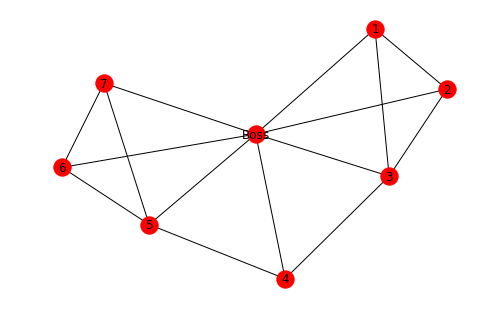

In [11]:
# drawing the graph
nx.draw(G, with_labels=True)
plt.show()

In this network, say Boss have to communicate some of the employees more often. We want our network to reflect that. This is accomplished by assigning a weight to edges. Such networks are known as **weighted graphs** or **weighted networks**. First, all edges are assigned **`weight`** of 1.0.

In [12]:
# edge weights
# first, all edge weights are set to 1
for iEdge in G.edges():
    G.edges[iEdge]['weight']=1.0

But some edges represent stronger connections. This can be described by higher weights.

In [13]:
# giving some edges more weight
G['Boss'][3]['weight'] = 3
G[2][3]['weight'] = 4
G['Boss'][7]['weight'] = 4

Now let's check edge weights. This is done by the **`edges`** method with the parameter **`data=True`**. 

In [14]:
# checking edge weights
print(G.edges(data=True))

[('Boss', 1, {'weight': 1.0}), ('Boss', 2, {'weight': 1.0}), ('Boss', 3, {'weight': 3}), ('Boss', 4, {'weight': 1.0}), ('Boss', 5, {'weight': 1.0}), ('Boss', 6, {'weight': 1.0}), ('Boss', 7, {'weight': 4}), (1, 2, {'weight': 1.0}), (1, 3, {'weight': 1.0}), (2, 3, {'weight': 4}), (3, 4, {'weight': 1.0}), (4, 5, {'weight': 1.0}), (5, 6, {'weight': 1.0}), (5, 7, {'weight': 1.0}), (6, 7, {'weight': 1.0})]


Now we can re-draw the network. This time, we would like to incorporate the weight information. To do so, we draw nodes, edges, and node labels separately. The first step is to determine the optimal placement of nodes. We will use the **circular layout**, implemented as **`circular_layout`** function. This layout places nodes in a circular formation. We provide the graph object `G` as the input parameter.

In [15]:
# drawing the graph  --- circular layout
pos = nx.circular_layout(G) # positions for all nodes

Then we draw nodes with **`draw_networkx_nodes`** function, with the graph object `G` and the node positions **`pos`** determined earlier by `circular_layout`. Then we draw edges with the edge weight as the line thickness. To do so, we have to extract edge weights. Once we have the edge weight information, we draw edges with **`draw_networkx_edges`**, with the **`width`** parameter describing the line width of each edge. Finally node labels are added by **`draw_networkx_lables`**. We turn of the axes by **`plt.axis('off')`**.

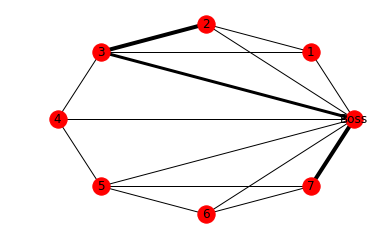

In [16]:
# nodes
nx.draw_networkx_nodes(G, pos)

# edges
edgeweight = [ d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edgeweight)

# labels
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

We can draw the same network with a different layout. Here, we try the **Kamada-Kawai algorithm**, implemented as **`kamada_kawai_layout`** function. This algorithm attempts to place nodes so that strongly connected nodes are closer to each other. We provide the graph object G as the input parameter.

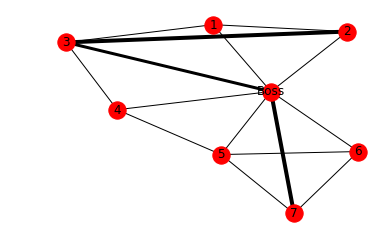

In [17]:
# drawing the graph  --- Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(G, pos, width=edgeweight)

# labels
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

# 2. Network construction example
<hr style="height:1px;border:none" />

Now let's create a network from an example data. We have a list of lists indicating employees working together at a certain business on different days of week.

`<ConstructNetwork.py>`

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# a list of emplyees on the same shift
listWorkers = [['Manager1', 1, 3, 4, 5],
               ['Manager1', 1, 2, 3],
               ['Manager1', 3, 5, 6, 7],
               ['Manager1', 1, 7, 8],
               ['Manager1', 2, 4, 6, 7],
               ['Manager2', 4, 8, 9, 10, 11],
               ['Manager2', 8, 10, 11, 12]]

Now let's examine this data as a network showing which employees work together this particular week. Here, we have a `for` loop over different days of the week, and within that `for` loop is another `for` loop for employees working on that day. Employees are added to the network as a node, if they are not already in the network (i.e., `iNode not in G`). When the `for` loop for employees are done, then we add edges with nested `for` loops. If two employees are not connected (i.e. `jNode not in G[iNode]`), then an edge is added between them. If they are connected, then the edge weight is increased by 1.

In [19]:
# first, creating a graph
G=nx.Graph()

# loop over days
for iDay in range(len(listWorkers)):
    # adding nodes. Check if node exists first before adding
    for iNode in listWorkers[iDay]:
        if iNode not in G:
            G.add_node(iNode)
    # adding edges. Check if edge exists before adding
    for i,iNode in enumerate(listWorkers[iDay]):
        for j,jNode in enumerate(listWorkers[iDay],i+1):
            # if iNode and jNode are not connected
            if (iNode!=jNode) and (jNode not in G[iNode]):  
                G.add_edge(iNode,jNode,weight=1.0)
            # if iNode and jNode are connected            
            elif iNode!=jNode:  
                G[iNode][jNode]['weight'] += 1.0

### Exercise
1. **Visualizing the co-worker network**. Draw the co-worker network **`G`** with the Kamada-Kawai layout. 

## Saving and loading network data

There are multiple formats to save network data. Fortunately **`newtorkx`** can handle a number of file formats for network data. For a complete list of file formats, consult [networkX's documentation](https://networkx.github.io/documentation/stable/reference/readwrite/index.html). Here are examples of writing and reading network data in 3 different file formats.

In [20]:
# Saving the graph in different formats
# adjacency list
nx.write_adjlist(G,'CoWorking.adjllist')

# edge list
nx.write_edgelist(G,'CoWorking.edgelist')

# GML
nx.write_gml(G,'CoWorking.gml')


# loading the graph
Gadj = nx.read_adjlist('CoWorking.adjllist')

Gedge = nx.read_edgelist('CoWorking.edgelist')

Ggml = nx.read_gml('CoWorking.gml')

## Drawing network data, a more sophisticated way

We have seen that **`networkx`** can draw networks. There are also other software packages people use to draw network data with additional functionalities. Here is a short list of such packages:

  * Gephi
  * Cytoscape
  * NodeXL
  * Pajek
  * Graphviz
  

# 3. Examples of networks
<hr style="height:1px;border:none" />

Now that we have seen how to read network data in various formats, we can take a look at some of publicly available network data.

`<ExampleNetworks.py>`

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

## Les Miserables interaction network

This network data set **`lesmis.gml`** is from Mark Newman's [network data repository](http://www-personal.umich.edu/~mejn/netdata/). Each node in this network is a character from Victor Hugo's novel, Les Miserables. Edges represent interactions among characters. As you can imagine, the main character, Valjean, is the center of this network. 

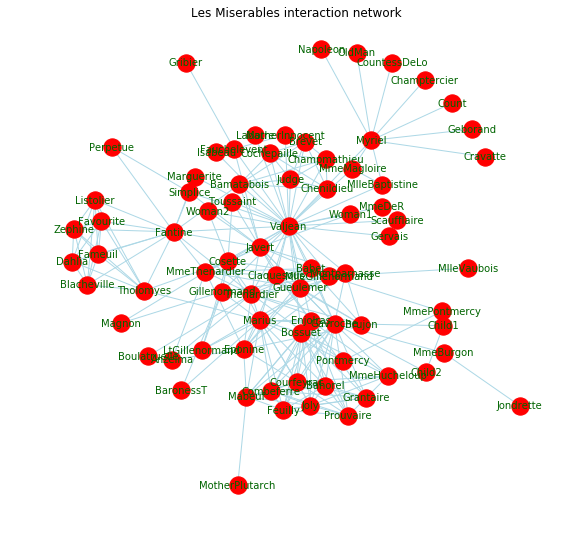

In [23]:
# loading the Les Miserables network
G = nx.read_gml('lesmis.gml')

# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Les Miserables interaction network')
plt.show()

## College football network

This network data set **`football.gml`** is another network from Mark Newman's [network data repository](http://www-personal.umich.edu/~mejn/netdata/). Each node in this network is an NCAA Division I football team. Edges represent matches between different schools in the Fall 2000 season. You may notice that colleges are grouped according to different conferences.

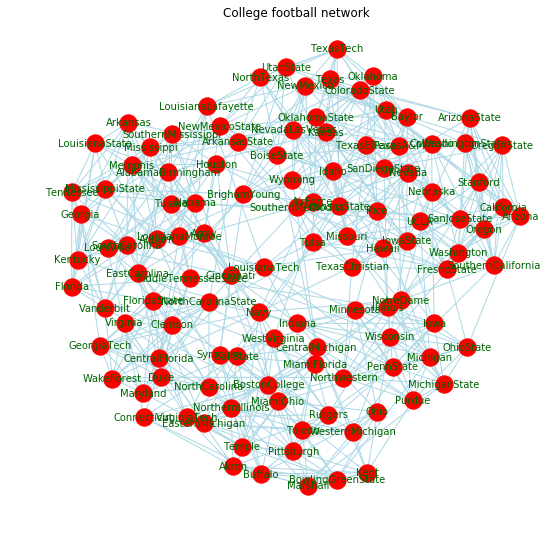

In [25]:
# loading the college football network
G = nx.read_gml('football.gml')

# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('College football network')
plt.show()

## Florentine family network

This network data set **`Padgett.paj`** is a sample network available from [Pajek](http://vlado.fmf.uni-lj.si/pub/networks/data/), a network visualization software package. Each node in this network is a prominent family in Renaissance Era Florence. Edges represent family relationships. The most prominent is the Medici family.

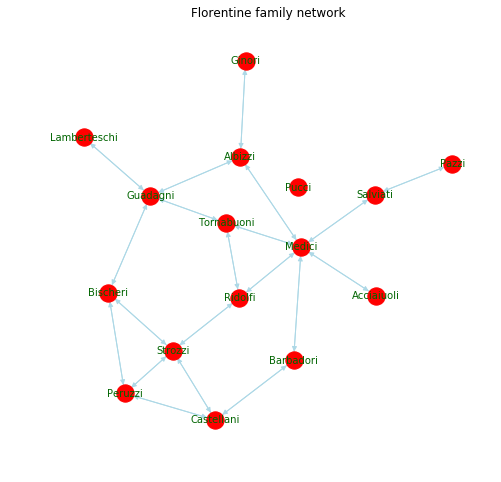

In [26]:
# loading the Florentine family network
G = nx.read_pajek('Padgett.paj')

# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[8,8])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Florentine family network')
plt.show()

## Chesapeake Bay food web

This network data set **`Padgett.paj`** is another sample network available from [Pajek](http://vlado.fmf.uni-lj.si/pub/networks/data/). Each node in this network is a species or a class of organisms in Chesapeake Bay. Edges represent predator/pray relationships. 

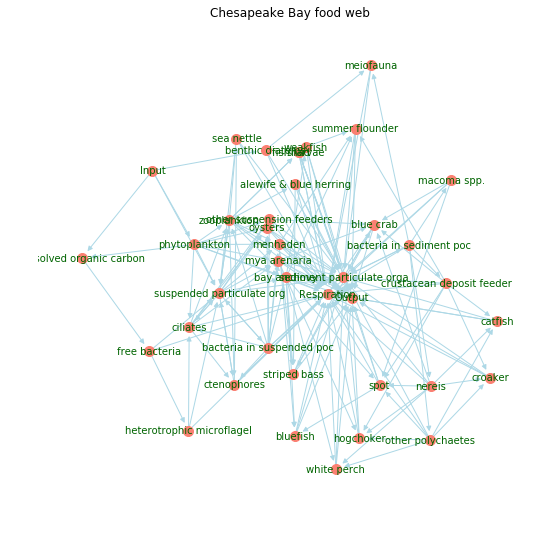

In [29]:
# loading the Chesapeake Bay food web
G = nx.read_pajek('Chesapeake.paj')

# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='Salmon', node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='DarkGreen')
plt.axis('off')
plt.title('Chesapeake Bay food web')
plt.show()

## C. Elegans neural network

This network data set **`celegansneural.gml`** is another network from Mark Newman's [network data repository](http://www-personal.umich.edu/~mejn/netdata/). The complete neuronal network of C. Elegans has been mapped, consisting of ~300 nodes (neurons) and their interconnections. 

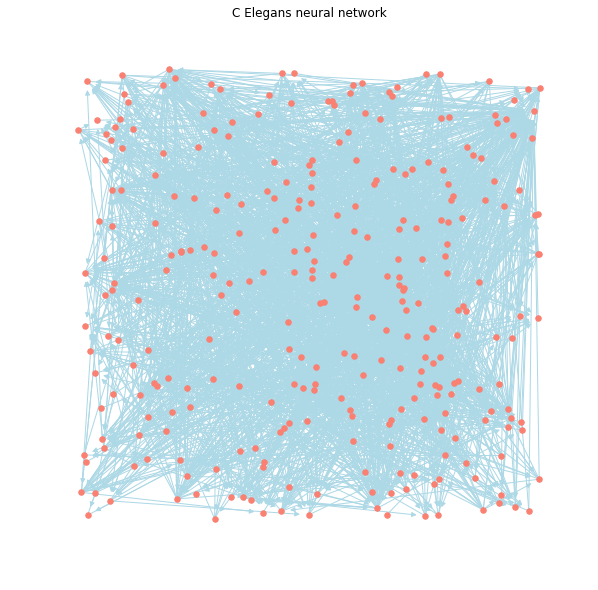

In [30]:
# loading the C Elegans neural network
G = nx.read_gml('celegansneural.gml')

# drawing the graph  --- random
plt.figure(figsize=[10,10])
pos = nx.random_layout(G) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='salmon')
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
plt.axis('off')
plt.title('C Elegans neural network')
plt.show()

As you can see, once the number of nodes reaches hundreds, it is very hard to ascertain information just by visually examining a network. Thus it is not unusual that a complete large network is not presented as a figure; rather, people simply focus on examining characteristics of the network that can be easily quantified. 

# 4. Constructing a network
<hr style="height:1px;border:none" />

Constructing a network from a real data set requires some context knowledge of the data; at least how data are organized. Here are three examples of such data sets. They are organized differently, as you can see. Nevertheless these data sets can be presented as a network. 

### Exercise

Choose one of the exercises below and construct a network.

1. **Co-authorship network**. The data file **`Bib-RFTBrainImaging.txt`** contains a list of authors from 77 hits by a PubMed search with terms `"random field theory brain imaging"` (the instructor's expertise area in his dissertation). For your convenience, there is a program (**`Coauthorship.py`**, available on GitHub) that reads the data file into a list of 77 separate lists of co-authors. Your task is to construct a co-authorship network. In the network, each node represents an author, and edges connecting them represent co-authorship (i.e., authored the same paper together).

2. **Airline network**. The data file **`Southwest_Mar2013.csv`** contains passenger information on all domestic routes by Southwest Airlines in March 2013. In particular, each entry contains: the origin airport code, the destination airport code, and the number of passengers for that month. For your convenience, there is a program (**`Airline.py`**,  available on GitHub) that reads the data file into a data frame with 3 columns: ORIGIN (origin airport code), DEST (destination airport code), PASSENGER (number of passengers). Construct a network with each airport as a node and edges representing routes between airports. In the network, you can ignore the directionality of an edge (i.e., an edge ('ABQ','AUS') represents flights from ABQ to AUS, as well as AUS to ABQ). (***Optional***) You can assign weights to edges describing the total passengers on those routes.

3. **Brain fMRI network**. The data file **`CorrMat_Brain.npz`** contains the correlation matrix of brain functional MRI (fMRI) signals from 90 distinct brain areas in a particular individual. You want to construct a network showing strong correlations (known as functional connectivity) among brain areas. In particular, the resulting network has nodes representing 90 brain areas, and edges showing strong correlations. For your convenience, there is a program (**`Brain_fMRI.py`**,  available on GitHub) that reads the data file into two arrays: **`R`**: 90x90 correlation matrix and **`nodeName`**: a list of brain areas. The row/column order of `R` is the same as the order of entries in `nodeName`. The main diagonal of `R` is converted to zero (as opposed to 1 in a typical correlation matrix) for your convenience. Two arrays **`rowInd`** and **`colInd`** contain the row and column indices, respectively, of elements of `R` exceeding the correlation threshold **`threshR=0.5`**. You task is to construct a network using these indices (`rowInd` and `colInd`). You can label nodes with the names provided in `nodeName`.